# Explore here

In [55]:
import pandas as pd
from utils import db_connect
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [3]:
engine = db_connect()

# Consultar la tabla en la base de datos y crear un DataFrame
total_data = pd.read_sql_table('tabla diabetes', engine)

pd.set_option('display.max_columns', None)  # muestra todas las columnas del dataframe
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
total_data.to_csv('/workspaces/Decision-tree-algorithm/data/raw/diabetes.csv', index=False)

In [5]:
total_data.shape

(768, 9)

In [6]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
total_data.duplicated().any()

False

In [9]:
total_data.isnull().any().any()

False

Análisis variables numéricas

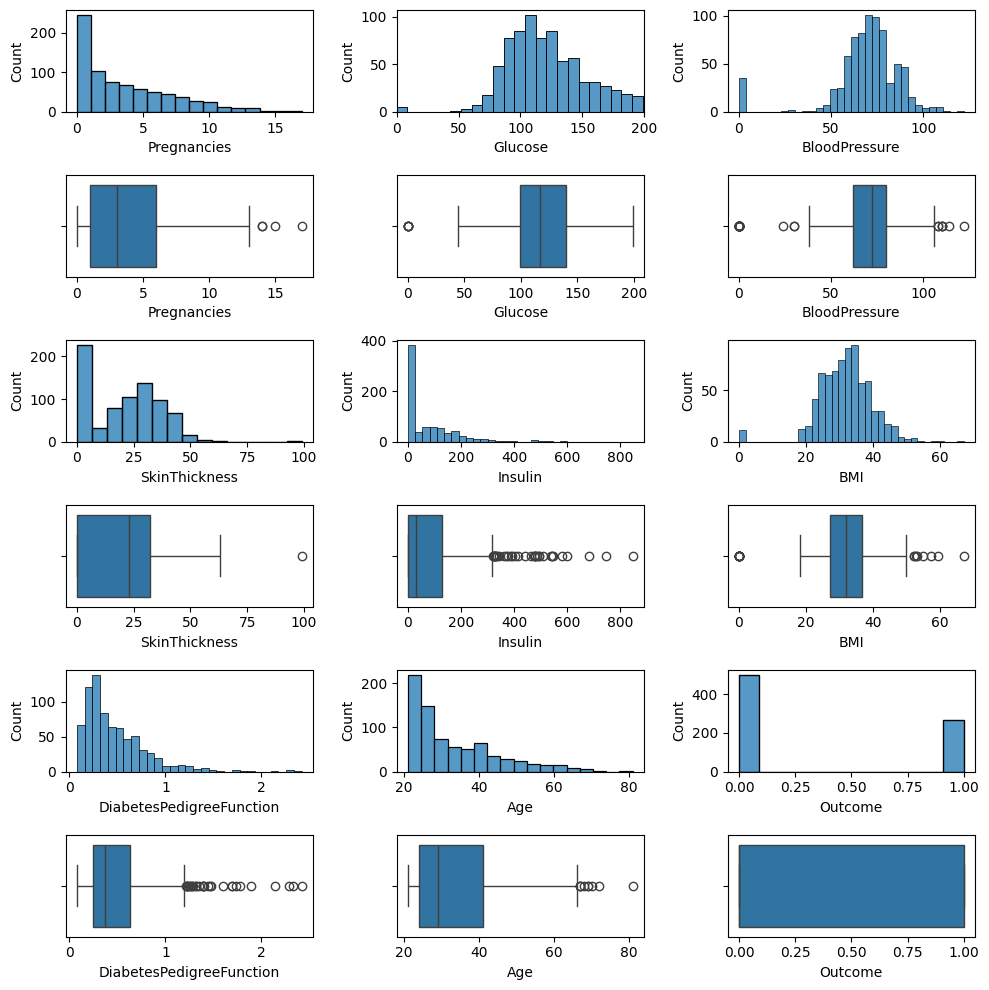

In [14]:
fig, axis = plt.subplots(6, 3, figsize = (10, 10))

sns.histplot(ax = axis[0, 0], data = total_data, x = "Pregnancies")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Pregnancies")

sns.histplot(ax = axis[0, 1], data = total_data, x = "Glucose").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Glucose")

sns.histplot(ax = axis[0, 2], data = total_data, x = "BloodPressure")
sns.boxplot(ax = axis[1, 2], data = total_data, x = "BloodPressure")

sns.histplot(ax = axis[2, 0], data = total_data, x = "SkinThickness")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "SkinThickness")

sns.histplot(ax = axis[2, 1], data = total_data, x = "Insulin")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "Insulin")

sns.histplot(ax = axis[2, 2], data = total_data, x = "BMI")
sns.boxplot(ax = axis[3, 2], data = total_data, x = "BMI")

sns.histplot(ax = axis[4, 0], data = total_data, x = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[5, 0], data = total_data, x = "DiabetesPedigreeFunction")

sns.histplot(ax = axis[4, 1], data = total_data, x = "Age")
sns.boxplot(ax = axis[5, 1], data = total_data, x = "Age")

sns.histplot(ax = axis[4, 2], data = total_data, x = "Outcome")
sns.boxplot(ax = axis[5, 2], data = total_data, x = "Outcome")


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


 - Glucosa: 

Los niveles normales de glucosa en sangre en ayunas suelen estar entre 70 y 100 miligramos por decilitro (mg/dL). Durante el día, después de comer, los niveles de glucosa pueden aumentar temporalmente, pero deberían volver a caer dentro del rango normal en un período de tiempo relativamente corto.

Niveles de glucosa en sangre demasiado bajos, una condición conocida como hipoglucemia, pueden ser peligrosos y pueden causar síntomas como mareos, debilidad, sudoración, confusión e incluso pérdida de conciencia. Por lo tanto, los niveles de glucosa en sangre demasiado bajos requieren atención médica inmediata.

Por tanto, el gráfico nos muestra las mediciones de glucosa y vemos que hay algunas a 0, esto puede ser un error o mediciones a personas en estado crítico, lo cual es altamente improbable dada la ausencia total de la sustancia, por lo que en principio supondremos que tratamos con mediciones érroneas.

- Presión sanguínea:

Una presión arterial de cero indicaría que no hay flujo sanguíneo en el sistema circulatorio, lo cual sería incompatible con la vida. Incluso en situaciones extremas, como en casos de hemorragia severa o colapso circulatorio, la presión arterial no caería a cero, aunque podría disminuir significativamente.

La presión arterial se mide mediante dos valores: la presión sistólica (la presión arterial durante la contracción del corazón) y la presión diastólica (la presión arterial cuando el corazón está en reposo entre latidos). Los valores normales de presión arterial en adultos sanos suelen ser alrededor de 120/80 mmHg, donde 120 representa la presión sistólica y 80 representa la presión diastólica.

Por tanto, es imposible que los datos del gráfico que nos muestran un porcentaje relevante de nivel 0 sean correctos. Esto refuerza la suposición anterior de que hay mediciones érroneas en nuestro conjunto de datos. Analizaremos como tratar cada caso en adelante.

 - Grosor de la piel:

 Vemos la misma situación, es imposible que el grosos de la piel sea 0, sobre todo teniendo en cuenta que se mide en milímetros. Además vemos un porcentaje importante de mediciones a 0.

  - Insulina:

Es altamente improbable que una persona viva tenga niveles de insulina en sangre de exactamente cero en condiciones normales. La insulina es una hormona producida por el páncreas y desempeña un papel crucial en el metabolismo de la glucosa, ayudando a regular los niveles de azúcar en sangre.

Incluso en personas que no tienen diabetes, es normal que los niveles de insulina en sangre fluctúen durante el día en respuesta a la ingesta de alimentos y otros factores, pero es poco probable que estos niveles alcancen cero, ya que incluso en ayunas, el cuerpo sigue produciendo algo de insulina para mantener la homeostasis.

En casos de diabetes tipo 1 no tratada, donde el cuerpo no produce insulina en absoluto, los niveles de insulina en sangre pueden ser muy bajos pero rara vez llegarán a cero. En la diabetes tipo 2, la resistencia a la insulina puede provocar niveles elevados de azúcar en sangre y, a menudo, se asocia con niveles de insulina más altos en lugar de niveles bajos.

En resumen, aunque es poco común, tener niveles de insulina en sangre cercanos a cero en una persona viva en condiciones normales sería atípico y podría indicar una condición médica subyacente que requiere atención.

Dado el enorme porcentaje de mediciones a cero en los niveles de insulina, podemos concluír que son mediciones érroneas, ya que si bien sería posible tener algún caso excepcional, solo observando el gráfico vemos que si no son la mayoria de las mediciones se acercan a la mitad del conjunto.
Por tanto, tenemos dos opciones a priori, eliminar la columna a pesar de que sea una información altamente relevante para la predicción de la diabetes, o eliminar las filas a pesar de reducir nuestro conjunto de datos significativamente. 
En este caso, la imputación no sería una opción, ya que es una variable extremadamente relevante, los datos faltantes son demasiados y además son datos médicos.


 - Diabetes Pedigree Function (DPF):

"Función de Pedigrí de Diabetes", es un término que se refiere a una métrica utilizada en el campo de la epidemiología y la genética para evaluar el riesgo de desarrollar diabetes tipo 2 en función de la historia familiar de la enfermedad.

La DPF se calcula mediante un algoritmo que tiene en cuenta la edad de inicio de la diabetes en familiares directos (como padres o hermanos) y la relación de parentesco con el individuo en cuestión. Esta función busca estimar la probabilidad de que un individuo herede la predisposición genética a la diabetes tipo 2 en función de su árbol genealógico.

En términos prácticos, cuanto mayor sea el valor de la DPF, mayor será el riesgo de desarrollar diabetes tipo 2. Sin embargo, es importante tener en cuenta que la DPF es solo una de las muchas herramientas utilizadas para evaluar el riesgo de diabetes y no debe considerarse como un diagnóstico definitivo por sí sola.

Es importante que cualquier evaluación del riesgo de diabetes se realice en consulta con un profesional de la salud, quien puede tener en cuenta otros factores de riesgo, como el índice de masa corporal (IMC), la actividad física, la alimentación y los antecedentes médicos personales, para proporcionar una evaluación más completa y precisa.

In [19]:
zeros = total_data[total_data['Insulin'] == 0].shape[0]
p = (zeros / len(total_data))*100
p

48.69791666666667

In [20]:
piel = total_data[total_data['SkinThickness'] == 0].shape[0]
pp = (piel / len(total_data))*100
pp

29.557291666666668

In [28]:
filas_con_zeros = total_data[(total_data['Insulin'] == 0) & (total_data['SkinThickness'] == 0) & (total_data['BloodPressure'] == 0)]
fil = (filas_con_zeros.shape[0] / len(total_data))*100
fil

4.296875

In [29]:
total_data.drop(filas_con_zeros.index, inplace=True)

Vemos que hay 33 filas que tienen tanto la insulina, como el grososr de la piel y la presión sanguínea a 0, características que no pueden tener dicho valor, por lo que son érroneas. Teniendo en cuenta que tienen estas tres características mas y que suponen menos del 5% del dataset, las eliminamos.

In [31]:
total_data.drop(['Insulin'], axis=1, inplace=True)

Eliminamos tambien la columna Insulina, ya que tiene casi la mitad de los datos érroneos y no se pueden imputar.

In [32]:
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1


Análisis variables multivariantes (númerico-númerico)

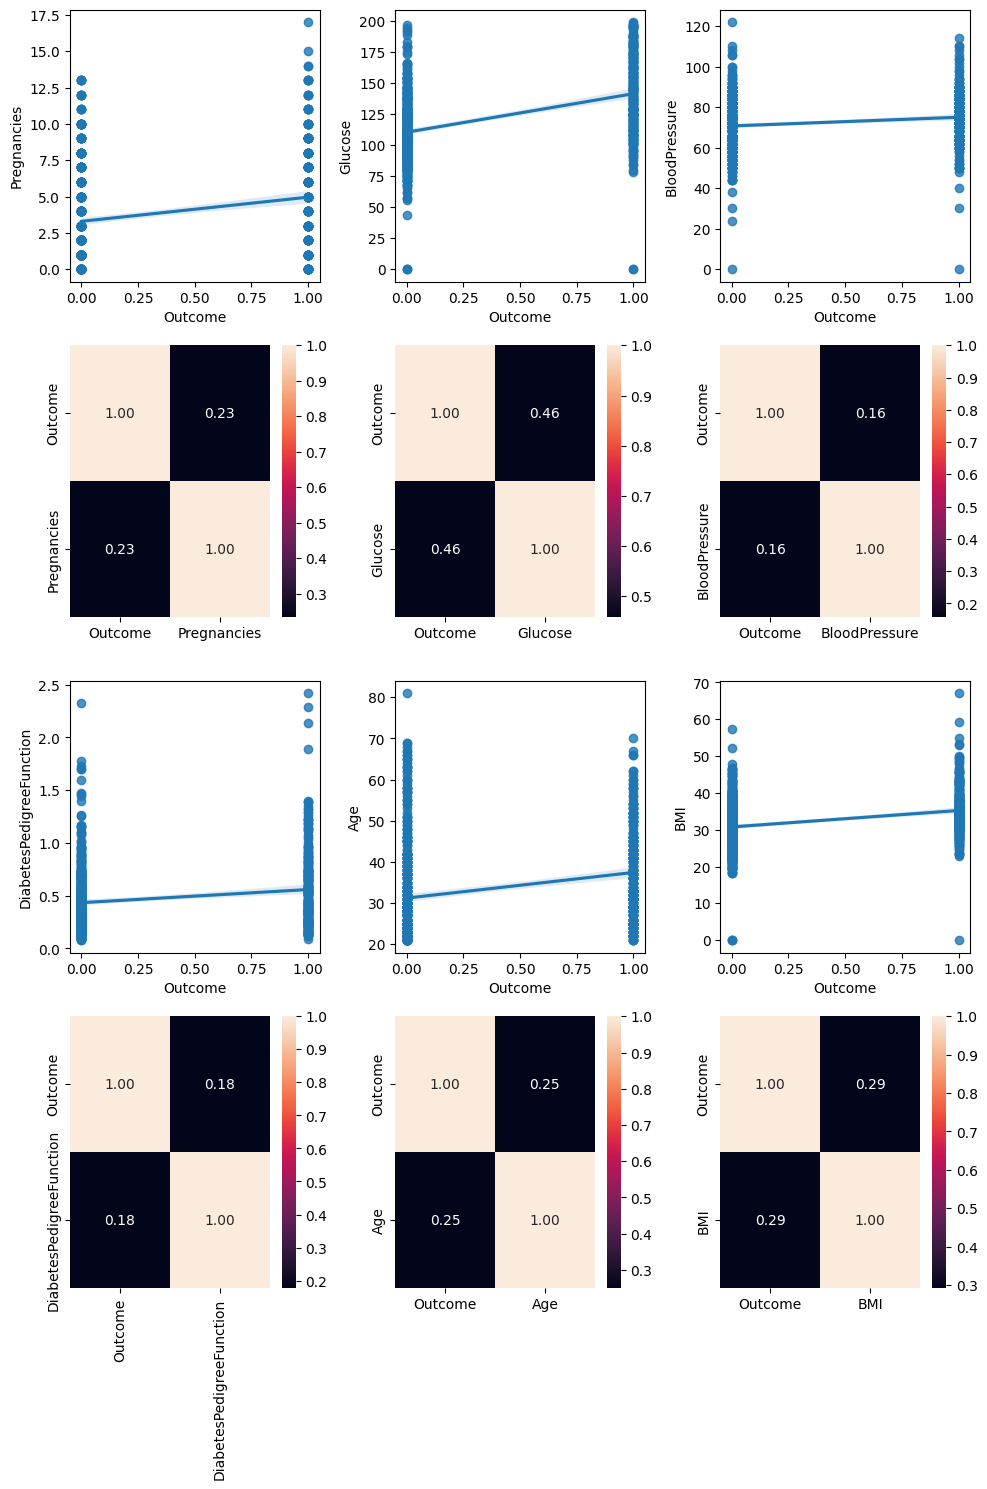

In [42]:
fig, axis = plt.subplots(4, 3, figsize=(10, 15))

# Create Plots
sns.regplot(data=total_data, x="Outcome", y="Pregnancies", ax=axis[0, 0])
sns.heatmap(total_data[["Outcome", "Pregnancies"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0])

sns.regplot(data=total_data, x="Outcome", y="Glucose", ax=axis[0, 1])
sns.heatmap(total_data[["Outcome", "Glucose"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

sns.regplot(data=total_data, x="Outcome", y="BloodPressure", ax=axis[0, 2])
sns.heatmap(total_data[["Outcome", "BloodPressure"]].corr(), annot=True, fmt=".2f", ax=axis[1, 2])

sns.regplot(data=total_data, x="Outcome", y="DiabetesPedigreeFunction", ax=axis[2, 0])
sns.heatmap(total_data[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0])

sns.regplot(data=total_data, x="Outcome", y="Age", ax=axis[2, 1])
sns.heatmap(total_data[["Outcome", "Age"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1])

sns.regplot(data=total_data, x="Outcome", y="BMI", ax=axis[2, 2])
sns.heatmap(total_data[["Outcome", "BMI"]].corr(), annot=True, fmt=".2f", ax=axis[3, 2])

# Adjust layout
plt.tight_layout()
plt.show()

Análisis de Correlación

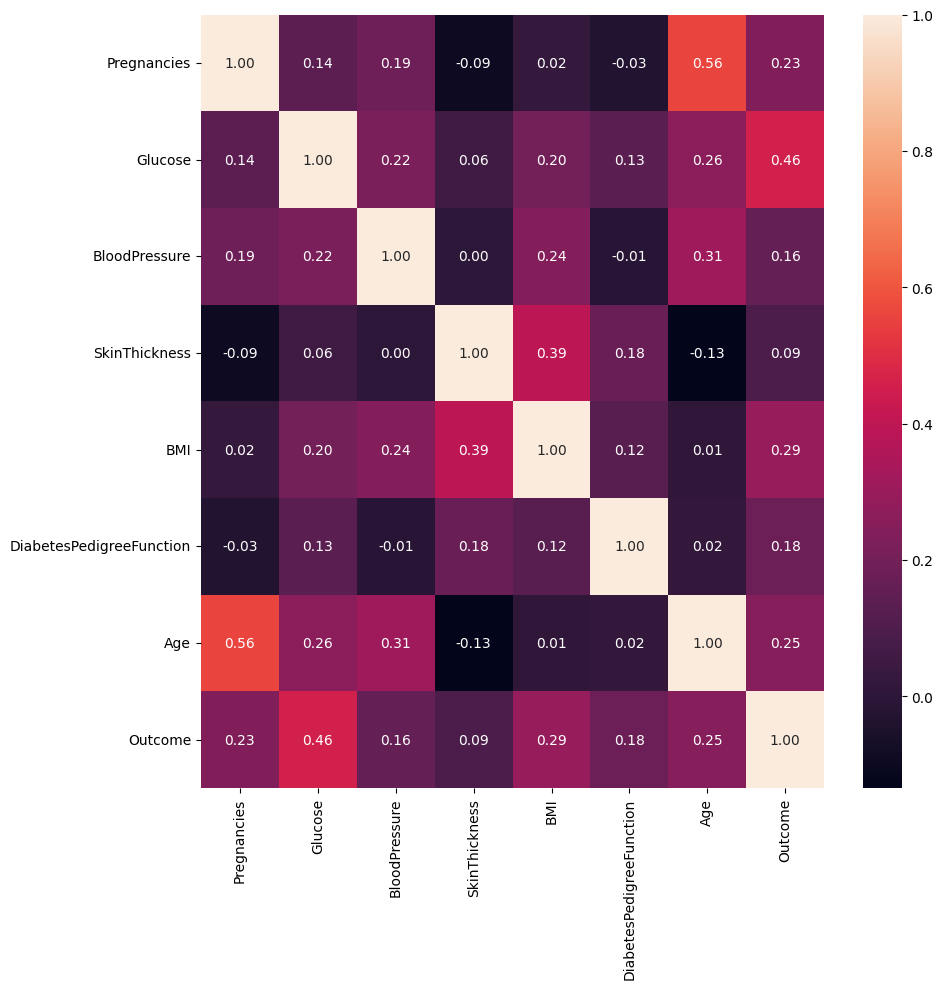

In [44]:
fig, axes = plt.subplots(figsize=(10, 10))

sns.heatmap(total_data.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

Observamos que la columna relativa al grosor de la piel no tiene apenas correlacion con la variable objetivo, y como vimos antes, el 30% de los datos son erroneos, ya que no se puede tener un grosor de 0.
Aunque estos valores son perfectamente imputables, al no guardar apenas correlacion con la variable objetivo, a pesar de que para un árbol de decisión esto no tiene la importancia que si tiene para un modelo de regresión lineal, vamos a eliminar esta variable.

In [45]:
total_data.drop(['SkinThickness'], axis=1, inplace=True)

In [47]:
total_data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


Análisis de Outliers

In [48]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,3.865306,121.006803,72.208163,32.298503,0.476392,33.364626,0.344218
std,3.371152,32.161949,12.928495,7.268129,0.333921,11.831485,0.475436
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.300000,0.380000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.600000,0.630000,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


 - Embarazos (Pregnancies):

La mayoría de las personas en el conjunto de datos han experimentado entre 1 y 6 embarazos, con una media de aproximadamente 3.87. Esto sugiere que la muestra parece estar equilibrada en términos de la cantidad de embarazos.

 - Glucosa (Glucose):

La media de glucosa en sangre es de aproximadamente 121 mg/dl, con un rango bastante amplio de 0 a 199 mg/dl. La mayoría de las personas parecen tener niveles de glucosa dentro del rango normal, pero también hay algunas con valores extremadamente bajos (0 mg/dl).

 - Presión sanguínea (BloodPressure):

La presión sanguínea media es de alrededor de 72 mmHg, con valores que van desde 0 hasta 122 mmHg. La distribución parece estar centrada alrededor del valor medio, pero hay algunas observaciones con presión sanguínea muy baja (0 mmHg), lo cual puede ser un error o una situación médica anormal.

 - Índice de masa corporal (BMI):

El índice de masa corporal promedio es de aproximadamente 32.3, con valores que van desde 0 hasta 67.1. Esto sugiere que hay una amplia variabilidad en el BMI en la muestra, con algunos valores extremadamente altos.

 - Función de pedigrí de diabetes (DiabetesPedigreeFunction):

La función de pedigrí de diabetes promedio es de aproximadamente 0.48, con valores que van desde 0.078 hasta 2.42. La mayoría de las personas parecen tener valores bajos a moderados de esta función, pero hay algunas con valores muy altos, lo que indica un mayor riesgo de diabetes según la historia familiar.

 - Edad (Age):

La edad media en la muestra es de aproximadamente 33.36 años, con un rango que va desde 21 hasta 81 años. Parece haber una distribución relativamente uniforme de las edades en la muestra, con una ligera inclinación hacia los adultos jóvenes y de mediana edad.

 - Resultado (Outcome):

La mayoría de las personas en la muestra (aproximadamente el 65.58%) no tienen diabetes (Outcome = 0), mientras que alrededor del 34.42% tienen diabetes (Outcome = 1). Esto indica un desequilibrio en la variable objetivo, con una proporción mayor de personas sin diabetes en la muestra.

Distancia de Cook

In [59]:
# Variables independientes/dependiente
X = total_data.drop(['Outcome'], axis=1)
y = total_data['Outcome']

# Ajusta el modelo
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación
cooks_distance = model.get_influence().cooks_distance

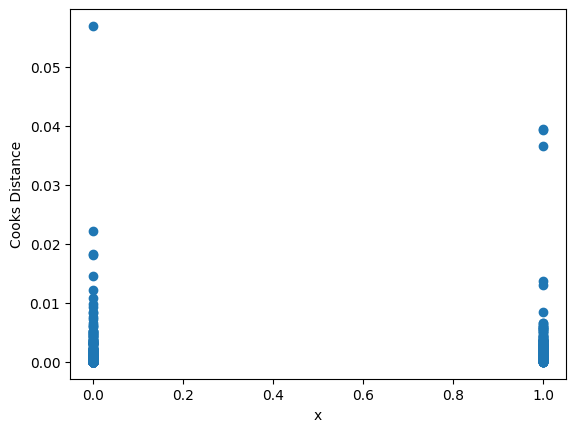

In [60]:
plt.scatter(total_data.Outcome, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [61]:
np.where(cooks_distance[0]>0.03)

(array([  8, 220, 334, 480]),)

In [66]:
total_data.drop(np.where(cooks_distance[0] > 0.03)[0]).reset_index(drop=True)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...,...
726,10,101,76,32.9,0.171,63,0
727,2,122,70,36.8,0.340,27,0
728,5,121,72,26.2,0.245,30,0
729,1,126,60,30.1,0.349,47,1


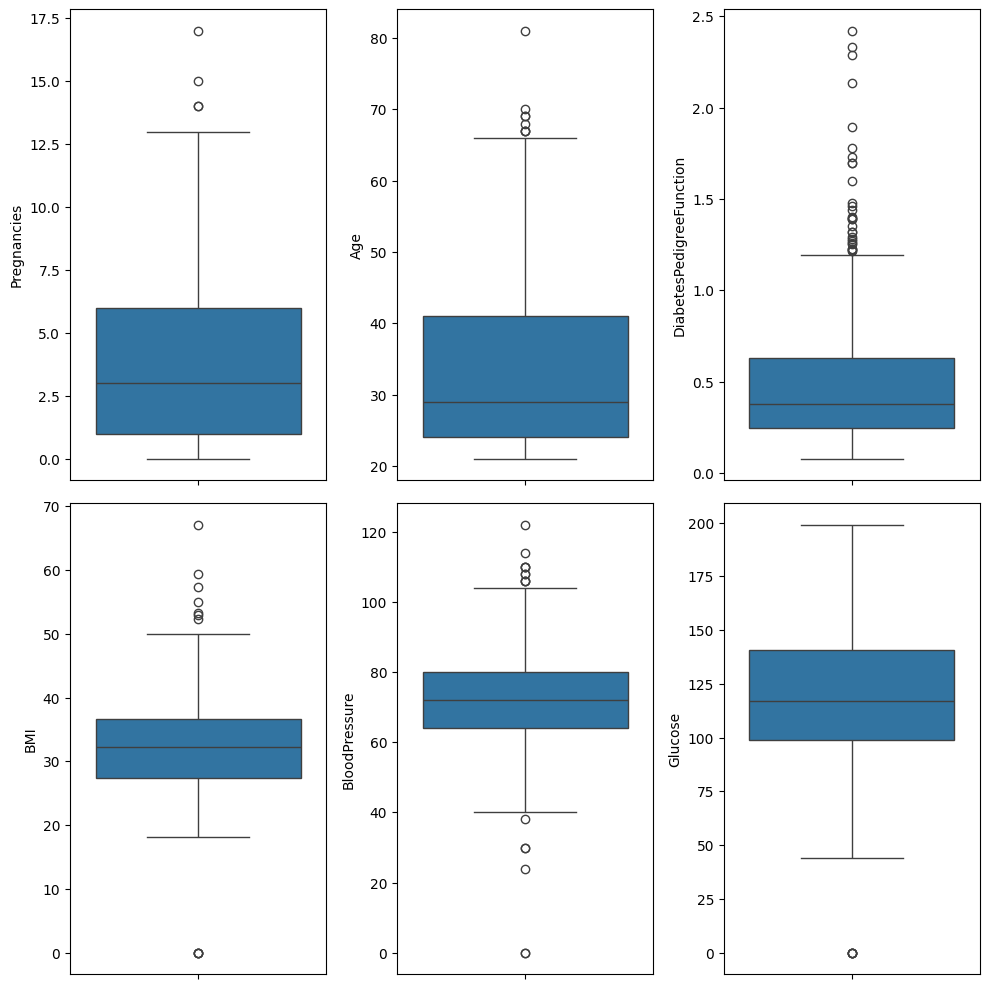

In [67]:
fig, axes = plt.subplots(2, 3, figsize = (10, 10))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "Pregnancies")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "Age")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "BMI")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "BloodPressure")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "Glucose")


plt.tight_layout()

plt.show()

Teniendo en cuenta que tanto la glucosa, la presion sanguínea y el BMI tienen algunos valores cero y esto es imposible o muy inusual, vamos a tratar estos valores extremos.

También trataremos los valores extremos, en este caso a lo alto, de los embarazos, puesto que observamos algunas métricas de entre 15 y 17 embarazos, lo cual quizás no es imposible, pero si extremadamente raro.

In [68]:
bmi = total_data[total_data['BMI'] == 0].shape[0]
pb = (bmi / len(total_data))*100
pb

0.5442176870748299

In [69]:
sangre = total_data[total_data['BloodPressure'] == 0].shape[0]
ps = (sangre / len(total_data))*100
ps

0.27210884353741494

In [70]:
glucosa = total_data[total_data['Glucose'] == 0].shape[0]
pg = (glucosa / len(total_data))*100
pg

0.6802721088435374

In [74]:

# Obtener los índices de las filas que cumplen con las condiciones
indices_bmi_zero = total_data[total_data['BMI'] == 0].index
indices_blood_pressure_zero = total_data[total_data['BloodPressure'] == 0].index
indices_glucose_zero = total_data[total_data['Glucose'] == 0].index

# Unir todos los índices que cumplen con las condiciones
indices_a_eliminar = indices_bmi_zero.union(indices_blood_pressure_zero).union(indices_glucose_zero)

# Eliminar las filas con los índices obtenidos
total_data = total_data.drop(indices_a_eliminar)

Como los valores faltantes no llegan a suponer el 2% del conjunto de datos, vamos a optar por eliminarlos.

Ahora veremos como tratar los valores extremos, paarece importante en los embarazos